This notebook explores Monte Carlo methods using Python.

Date Created: 12 Oct 2018
<br>
Last Modified: 19 Oct 2018 
<br>
Humans Responsible: The Prickly Pythons

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time

# 0.0 A bit of History
https://en.wikipedia.org/wiki/Monaco

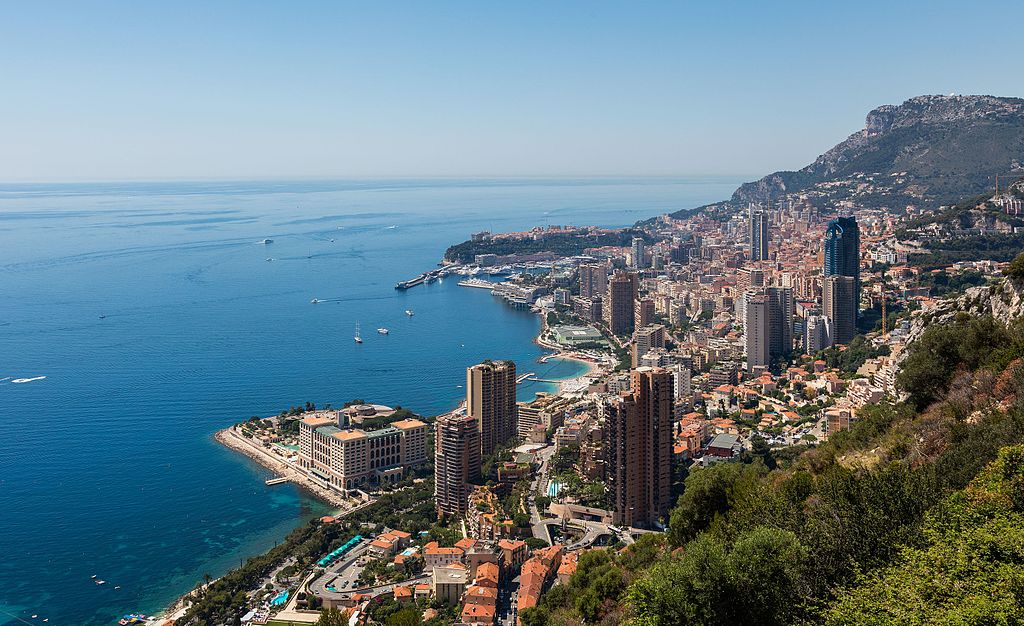

In [3]:
from IPython.display import Image
Image(filename='images/Monaco.jpg', width=800)

# 1.0 Random numbers
https://en.wikipedia.org/wiki/Linear_congruential_generator
<br>
https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html


In [4]:
N = 1000


a = 1664525
c = 1013904223
m = 2**32
x = 1 # The seed

results = np.zeros(N)

for n in range(N):
    x = (a*x + c) % m
    results[n] = x

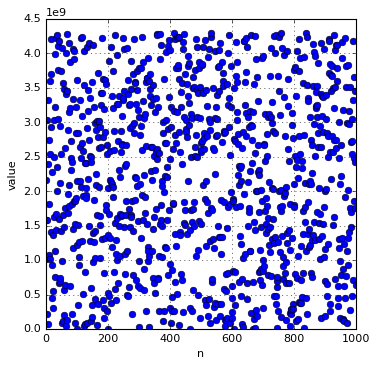

In [5]:
fig = plt.figure(figsize=(5,5))
plt.plot(results, 'bo', linewidth=2)
plt.xlabel('n')
plt.ylabel('value')
plt.grid()

plt.show()

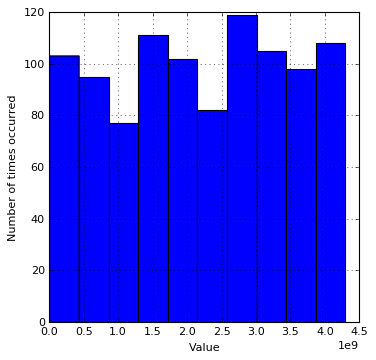

In [6]:
fig = plt.figure(figsize=(5,5))
plt.hist(results)
plt.xlabel('Value')
plt.ylabel('Number of times occurred')
plt.grid()

plt.show()

# 2.0 Monte Carlo Example - Estimating Pi

In [7]:
r = 1
x = np.linspace(-1,1,100)
y = np.sqrt(r**2 - x**2)

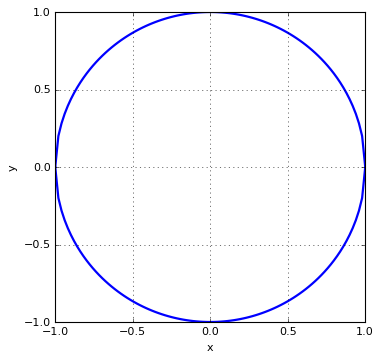

In [8]:
fig = plt.figure(figsize=(5,5))
plt.plot(x, y, 'b-', linewidth=2)
plt.plot(x, -y, 'b-', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.grid()

plt.show()

In [9]:
# Pick a random point on the interval [-1,1] for x and y
x_rand = np.random.uniform(-1,1)
y_rand = np.random.uniform(-1,1)

print(x_rand)
print(y_rand)

-0.1945965522803481
0.5091197732839432


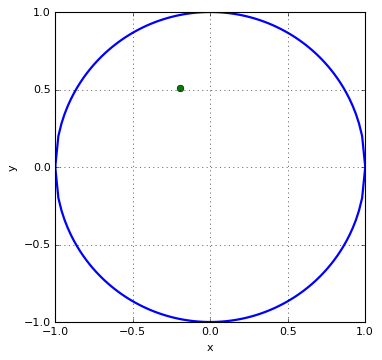

In [10]:
# If it's inside the circle, make it green, outside the circle, make it red.
if ((x_rand**2 + y_rand**2) < r**2):
    inside = True
else:
    inside = False


fig = plt.figure(figsize=(5,5))

if (inside == True):
    plt.plot(x_rand, y_rand, 'go')
else:
    plt.plot(x_rand, y_rand, 'ro')

plt.plot(x, y, 'b-', linewidth=2)
plt.plot(x, -y, 'b-', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.grid()

plt.show()

<IPython.core.display.Javascript object>


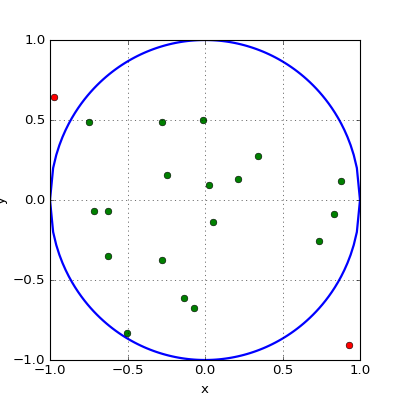

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [11]:
# Now do a loop
%matplotlib notebook


N = 20

# Initialise a figure
fig = plt.figure(figsize=(5,5))
plt.plot(x, y, 'b-', linewidth=2)
plt.plot(x, -y, 'b-', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.grid()


N_inside = 0

for n in range(0,N):
    print(n)
    
    x_rand = np.random.uniform(-1,1)
    y_rand = np.random.uniform(-1,1)
    
    if ((x_rand**2 + y_rand**2) < r**2):
        inside = True
    else:
        inside = False
    

    if (inside == True):
        plt.plot(x_rand, y_rand, 'go')
        N_inside += 1
    else:
        plt.plot(x_rand, y_rand, 'ro')

    fig.canvas.draw()
    time.sleep(0.1)
    
%matplotlib inline

In [12]:
p = N_inside/N
print(p)

0.9


In [13]:
A = 2*2 # Area of the box 
p*A # estimate for the area of the circle - which is pi in this case.

3.6

## For loop implementation

In [14]:
N = 1000
N_inside = 0

for n in range(0,N):    
    x_rand = np.random.uniform(-1,1)
    y_rand = np.random.uniform(-1,1)
    
    if ((x_rand**2 + y_rand**2) < r**2):
        N_inside += 1
        
p = N_inside/N
print("P(inside)= %.2f" % p)
print(p*A)

P(inside)= 0.76
3.056


## Vector op implementation

In [15]:
N = 1000

x_rand = np.random.uniform(-1,1,N)
y_rand = np.random.uniform(-1,1,N)
r_vec = r * np.ones([1,N])

N_inside = np.sum((x_rand**2 + y_rand**2) < r_vec**2)

p = N_inside/N
print("P(inside)= %.2f" % p)
print(p*A)

P(inside)= 0.78
3.112


## How does the estimate behave as we change N

In [16]:
N_min = 10
N_max = 100
N_vec = np.arange(N_min,N_max,1)
N_len = len(N_vec)

num_repeat = 1000

est_vec = np.zeros(num_repeat)
est_mean = np.zeros(N_len)
est_std = np.zeros(N_len)

for i in range(N_len):
    N = N_vec[i]
    r_vec = r * np.ones([1,N])
    
    for j in range(num_repeat):
        x_rand = np.random.uniform(-1,1,N)
        y_rand = np.random.uniform(-1,1,N)
        
        N_inside = np.sum((x_rand**2 + y_rand**2) < r_vec**2)
        
        p = N_inside/N
        est_vec[j] = p*A
        
    est_mean[i] = np.mean(est_vec)
    est_std[i] = np.std(est_vec)

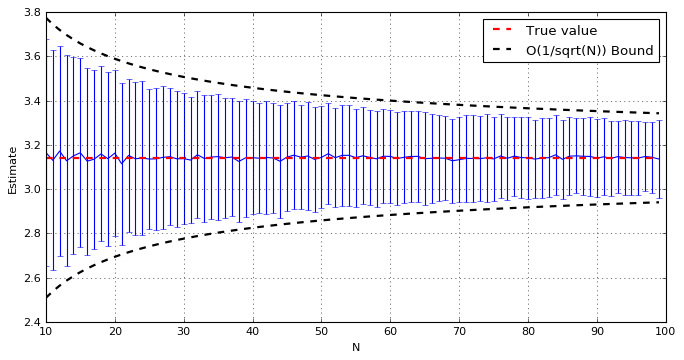

In [17]:
fig = plt.figure(figsize=(10,5))
plt.errorbar(N_vec, est_mean, yerr=est_std)
plt.plot(N_vec, np.pi*np.ones(N_len), 'r--', linewidth=2, label='True value')
plt.plot(N_vec,  2/np.sqrt(N_vec)+np.pi, 'k--', linewidth=2, label='O(1/sqrt(N)) Bound')
plt.plot(N_vec, -2/np.sqrt(N_vec)+np.pi, 'k--', linewidth=2)

plt.xlabel('N')
plt.ylabel('Estimate')
plt.grid()
plt.legend(loc='best')

plt.show()

P(inside)= 0.79
3.164


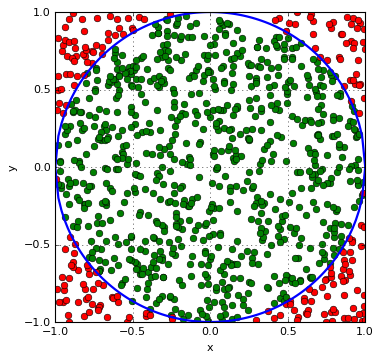

In [18]:
N = 1000
x_rand = np.random.uniform(-1,1,N)
y_rand = np.random.uniform(-1,1,N)
r_vec = r * np.ones([1,N])

binary_vec = (x_rand**2 + y_rand**2) < r_vec**2
N_inside = np.sum(binary_vec)

p = N_inside/N
print("P(inside)= %.2f" % p)
print(p*A)


fig = plt.figure(figsize=(5,5))

plt.plot(x_rand[binary_vec[0] == True], y_rand[binary_vec[0] == True], 'go')
plt.plot(x_rand[binary_vec[0] == False], y_rand[binary_vec[0] == False], 'ro')

plt.plot(x, y, 'b-', linewidth=2)
plt.plot(x, -y, 'b-', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.grid()

plt.show()